# 一.感知机

## 1.定义:
> 感知机接受多个信号, 输出一个信号

看一个示例

![示例](https://typora10213.oss-cn-guangzhou.aliyuncs.com/undefined20250327145933.png)

### 该图中, $x_1,x_2$是输入, y是输出信号. $w_1,w_2$是权重. "O"是神经元/节点. 神经元会计算传送过来的信号总和($w_1x_1+w_2x_2$), 当总和超过了界限(称为阈值$\theta$)才会输出1, 这个也称作"神经元激活"

$y = \begin{cases}
0 & \text{if } (w_1x_1+w_2x_2<=\theta) \\
1 & \text{if } (w_1x_1+w_2x_2>\theta) 
\end{cases}$

## 2.简单逻辑电路

- 与门:2者都为1输出才为1
- 与非门:颠倒与门的输出
- 或门:2者都为0输出才为0

## 3.感知机的实现

### (1)简单实现

In [1]:
def AND(x1,x2):
    w1,w2,theta = 0.5,0.5,0.7
    t = w1*x1 + w2*x2
    if t <=theta:
        return 0
    elif t>theta:
        return 1

In [2]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


### (2)导入权重和偏置

$y = \begin{cases}
0 & \text{if } (w_1x_1+w_2x_2+b<=0) \\
1 & \text{if } (w_1x_1+w_2x_2+b>0) 
\end{cases}$

> $w_i$为权重, $b$为偏置

In [3]:
import numpy as np
x=np.array([0,1])
w=np.array([0.5,0.5])
b=-0.7
print(w*x)
print(np.sum(w*x)+b)

[0.  0.5]
-0.19999999999999996


- 实现与门

In [4]:
def AND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.7
    t = np.sum(w*x)+b
    if t <=0:
        return 0
    elif t>0:
        return 1

print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


## 4.感知机的局限性

- 异或门:只有其中一个为1输出才是1

然而感知机无法实现异或门, 因为它只能表示由一条直线分隔的空间, 而异或门表示的空间无法用一条直线分隔

![](https://typora10213.oss-cn-guangzhou.aliyuncs.com/undefined20250327153429.png)

## 5.多层感知机

将单层感知机进行叠加即可

![](https://typora10213.oss-cn-guangzhou.aliyuncs.com/undefined20250327153810.png)

代码实现

In [9]:
def AND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.7
    t = np.sum(w*x)+b
    if t <=0:
        return 0
    elif t>0:
        return 1

def NAND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([-0.5,-0.5])
    b=0.7
    t = np.sum(w*x)+b
    if t <=0:
        return 0
    elif t>0:
        return 1

def OR(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.2
    t = np.sum(w*x)+b
    if t <=0:
        return 0
    elif t>0:
        return 1

def XOR(x1,x2):
    s1=NAND(x1,x2)
    s2=OR(x1,x2)
    y=AND(s1,s2)
    return y

print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0


![](https://typora10213.oss-cn-guangzhou.aliyuncs.com/undefined20250327154745.png)

# 二.神经网络

## 1.概念

- 输入层:最左边的一层
- 输出层:最右边的一层
- 隐藏层:中间的所有层(又称中间层)
- 激活函数:将输入的加权总和作为因变量,经过此函数输出特定结果.用于引入非线性因素，从而使得神经网络能够学习和模拟复杂的非线性关系。

$a = w_1*x_1 + w_2*x_2 + b$

$y=h(a)$

![](https://typora10213.oss-cn-guangzhou.aliyuncs.com/undefined20250327195215.png)

## 2.激活函数

### (1)sigmoid函数
$h(x)=\frac{1}{1+exp(-x)}$

In [29]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

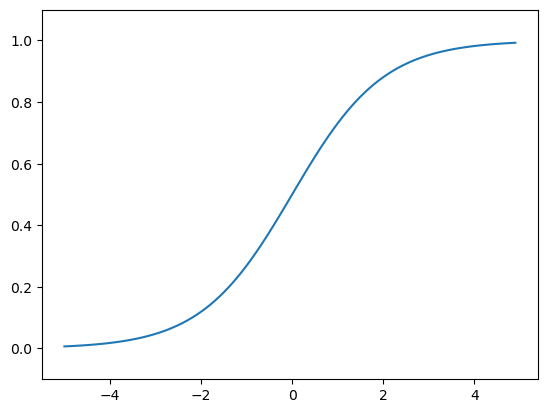

In [30]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### (2)越阶函数

$y=\begin{cases}
0 & \text{if }  x<=0 \\
1 & \text{if }  x>0
\end{cases}$

In [31]:
def step_function1(x):
    if x>0:
        return 1
    else:
        return 0

> 支持numpy的形式 :

In [32]:
def step_function2(x):
    return np.array(x > 0, dtype = np.int64)

[-1.  1.  2.]
[False  True  True]


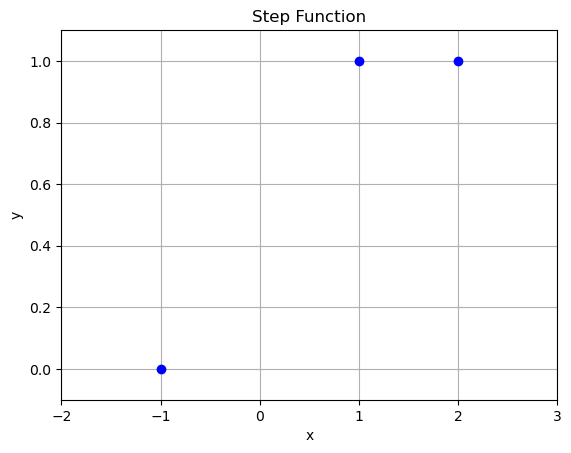

In [33]:
import numpy as np
import matplotlib.pylab as plt

x = np.array([-1.0,1.0,2.0])
print(x)
print(x>0)
y = step_function2(x)  

plt.scatter(x, y, color='blue', zorder=5)  #
plt.ylim(-0.1, 1.1)
plt.xlim(-2, 3)  
plt.title("Step Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

### (3)ReLU函数(Rectified Linear Unit)

$h(x)=\begin{cases}
x & \text{if} (x>0) \\
0 & \text{if} (x<=0)
\end{cases}$

In [34]:
def relu(x):
    return np.maximum(0,x)

### 3.3层神经网络的实现

### (1)符号解释

![](https://typora10213.oss-cn-guangzhou.aliyuncs.com/undefined20250327205127.png)

### (2)传递的实现

![](https://typora10213.oss-cn-guangzhou.aliyuncs.com/undefined20250327205344.png)

使用矩阵表示:
$A^{(1)} = XW^{(i)} + B^{(i)}$

其中: 
$A^{(i)} = \begin{pmatrix}
a_1^{(i)} & a_2^{(i)} & a_3^{(i)}
\end{pmatrix}$

$\mathbf{X} = \begin{pmatrix}
x_1 & x_2
\end{pmatrix}$

$B^{(i)} = \begin{pmatrix}
b_1^{(i)} & b_2^{(i)} & b_3^{(i)}
\end{pmatrix}$

$W^{(i)} = \begin{pmatrix}
w_{11}^{(i)} & w_{21}^{(i)} & w_{31}^{(i)} \\
w_{12}^{(i)} & w_{22}^{(i)} & w_{32}^{(i)}
\end{pmatrix}$

> 代码实现

In [37]:
def init_network():
    network = {}
    network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['w2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['w3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    return network

def forward(network,x):
    w1,w2,w3 = network['w1'], network['w2'], network['w3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x,w1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,w2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,w3)+b3
    y = a3
    return y

network = init_network()
x = np.array([1.0,0.5])
y= forward(network,x)
print(y)

[0.31682708 0.69627909]


## 4.输出层的设计

> 根据应用的领域不同, 可分为回问题和分类问题

### 回归问题用恒等函数, 分类问题用softmax函数

### (1)恒等函数

- 恒等函数:对于输入信息原封不动地直接输出

### (2)softmax函数

- softmax: $y_i=\frac{exp(a_k)}{\sum_{i=1}^nexp(a_i)}  (0<y_i<1)$

In [1]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

> 但该函数有个缺陷就是容易溢出,此时将函数进行改进

$y_i=\frac{exp(a_k+logC)}{\sum_{i=1}^nexp(a_i+logC)}=\frac{exp(a_k+C')}{\sum_{i=1}^nexp(a_i+C')}$

- C'一般为输入的最大值

In [5]:
import numpy as np

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)
print(np.sum(y)) #和总是1

[0.01821127 0.24519181 0.73659691]
1.0


> 由于对于softmax函数,输入大则输出大。一般神经网络只把输出值最大的神经元所对应的类别作为识别结果,所以输出层的softmax可以省略

## 5.神经网络学习

### (1).前向传播(forward propagatin):
> 神经网络从输入层到输出层的计算过程

### (2).反向传播(back propagation):
> 是神经网络训练过程中一个非常关键的算法，用于计算损失函数对网络参数的梯度，从而指导网络参数的更新，优化网络性能

#### [1]. **反向传播的背景和目的**
在神经网络训练中，通常定义一个损失函数，用于衡量网络预测值与真实值之间的差异。训练的目标是通过调整网络的参数（权重和偏置），使损失函数的值尽可能小。反向传播算法通过计算损失函数对每个参数的梯度，帮助我们找到参数更新的方向和大小。

#### [2]. **反向传播的基本原理**
反向传播基于链式法则来计算梯度。链式法则是一种用于求复合函数导数的方法，它将复杂的函数分解为多个简单函数的组合，并逐步计算每个部分的导数。
假设有一个简单的神经网络，包含输入层、一个隐藏层和输出层，损失函数为L。需要计算损失函数L对每个权重 W 的梯度 $\frac{\partial L}{\partial w}$。

**链式法则的应用**

假设隐藏层的输出为h，输出层的输出为y，则损失函数L可以表示为：
$L = L(y)$

根据链式法则，损失函数L对权重w 的梯度可以表示为：
$\frac{\partial L}{\partial w} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial w}$

如果y 是由隐藏层的输出h通过某种函数f计算得到的，即 $y = f(h)$，那么：
$\frac{\partial L}{\partial w} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial h} \cdot \frac{\partial h}{\partial w}$

通过这种方式，可以逐步从输出层向输入层反向计算每个参数的梯度。

#### [3]. **反向传播的步骤**
反向传播的计算过程可以分为以下几个步骤：

- **前向传播**
首先，输入数据通过网络进行前向传播，计算出网络的输出值y 和损失函数L。

- **计算损失函数的梯度**
计算损失函数L对输出y的梯度：
$\frac{\partial L}{\partial y}$

- **逐层反向计算梯度**
从输出层开始，逐层向输入层反向计算每个参数的梯度。对于每一层，我们需要计算：
    - 当前层的输出对当前层输入的梯度（例如$\frac{\partial y}{\partial h}$)。
    - 当前层输入对前一层输出的梯度（例如$\frac{\partial h}{\partial w}$)。

具体来说：
- **输出层**：计算$\frac{\partial L}{\partial y}$和 $\frac{\partial y}{\partial w}$。
- **隐藏层**：计算$\frac{\partial L}{\partial h}$ 和$\frac{\partial h}{\partial w}$。

- **更新参数**
根据计算得到的梯度，使用优化算法（如梯度下降法）更新网络的参数。例如，对于权重w，更新公式为：
$w = w - \eta \cdot \frac{\partial L}{\partial w}$
其中$\eta$是学习率。

#### [4]. **反向传播的关键点**
- **激活函数的导数**：在计算梯度时，激活函数的导数非常重要。例如，ReLU激活函数的导数为：
$
f'(x) =
\begin{cases}
1, & \text{if } x > 0 \\
0, & \text{otherwise}
\end{cases}
$

- **梯度消失和梯度爆炸问题**：在深度神经网络中，反向传播可能会遇到梯度消失或梯度爆炸的问题。梯度消失是指梯度值变得非常小，导致参数更新缓慢，训练过程停滞；梯度爆炸是指梯度值变得非常大，导致参数更新过大，训练过程不稳定。解决这些问题的方法包括：
  - 使用合适的激活函数（如ReLU）。
  - 初始化参数时选择合适的范围（如Xavier初始化或He初始化）。
  - 使用梯度裁剪（Gradient Clipping）技术。
  - 使用批量归一化（Batch Normalization）等技术。


In [4]:
import numpy as np

# 激活函数及其导数
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 均方误差损失函数及其导数
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

# 初始化参数
np.random.seed(42)  # 为了结果可复现
input_size = 2   #输入层为2个神经元
hidden_size = 3  #隐藏层有3个神经元
output_size = 1  #输出层有1个神经元
learning_rate = 0.1   #学习率

# 初始化权重和偏置
W1 = np.random.randn(input_size, hidden_size)  # 输入层到隐藏层的权重
b1 = np.zeros((1, hidden_size))                # 输入层到隐藏层的偏置
W2 = np.random.randn(hidden_size, output_size) # 隐藏层到输出层的权重
b2 = np.zeros((1, output_size))                # 隐藏层到输出层的偏置

# 训练数据
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # 输入
y = np.array([[0], [1], [1], [0]])              # 真值（异或问题）

# 训练过程
epochs = 1000
for epoch in range(epochs):
    # 前向传播
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)  # 隐藏层激活
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)  # 输出层激活

    # 计算损失
    loss = mse_loss(y, a2)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

    # 反向传播
    # 输出层
    dL_da2 = mse_derivative(y, a2)
    da2_dz2 = sigmoid_derivative(a2)
    dL_dz2 = dL_da2 * da2_dz2
    dL_dW2 = np.dot(a1.T, dL_dz2)
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)

    # 隐藏层
    dL_da1 = np.dot(dL_dz2, W2.T)
    da1_dz1 = relu_derivative(a1)
    dL_dz1 = dL_da1 * da1_dz1
    dL_dW1 = np.dot(X.T, dL_dz1)
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

    # 参数更新
    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2

# 测试模型
print("测试模型：")
for x in X:
    z1 = np.dot(x, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    print(f"输入: {x}, 输出: {a2[0][0]:.4f}")

Epoch 0, Loss: 0.3274780407035275
Epoch 100, Loss: 0.29330907011571666
Epoch 200, Loss: 0.2649084337394191
Epoch 300, Loss: 0.25102146932963126
Epoch 400, Loss: 0.23759479864438182
Epoch 500, Loss: 0.21426417791440902
Epoch 600, Loss: 0.18491017219954037
Epoch 700, Loss: 0.15487282095828594
Epoch 800, Loss: 0.1264977459606972
Epoch 900, Loss: 0.10037415443109346
测试模型：
输入: [0 0], 输出: 0.3757
输入: [0 1], 输出: 0.7434
输入: [1 0], 输出: 0.7424
输入: [1 1], 输出: 0.1960


### (3)从数据中学习

#### [1]数据驱动
- 特征量:从输入(数据/图像)中准确地提取本质数据的转换器, 通常表示为向量的形式
神经网络中, 重要特征量是由机器来学习的

### [2]训练数据和测试数据

> 一般将数据分为**训练数据(又称监督数据)**和**测试数据**2部分进行学习和实验.
- 先使用训练数据进行学习, 寻找最优参数;然后使用测试数据评价训练得到的模型的实际能力
- 为了正确评价模型的泛化能力, 就要将数据划分为训练数据和测试数据

> 泛化能力是处理未被观察过的数据的能力

### [3]损失函数

- 均方误差:
    -  $E=\frac{1}{2}\sum_k(y_k-t_k)^2$
        -  $y_k$为神经网络的输出,$t_k$表示训练数据,k表示数据的维度
- 交叉熵误差:
    - $E=-\frac{1}{N}\sum_n\sum_k(t_{nk}\log y_{nk})$
        - 数据个数为N,$y_{nk}$是神经网络的输出,$t_{nk}$是第n个数据的第k个元素的值的正确解标签($t_k$中只有正确解标签的索引为1,其它均为0[one-hot编码表示]) 

### [4]mini-batch学习
- 每次迭代时，模型会使用一个小型的数据子集（称为“小批量”或“Mini - Batch”）来计算损失函数的梯度，并更新模型的参数。

举个例子

In [3]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# 假设有一些训练数据（特征和标签）
x_train = torch.randn(10000, 10)  # 10000 个样本，每个样本 10 个特征
y_train = torch.randint(0, 2, (10000,))  # 二分类任务的标签

# 将数据封装为 TensorDataset
dataset = TensorDataset(x_train, y_train)

# 创建 DataLoader，设置 Mini - Batch 大小为 32
batch_size = 32
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 假设有一个简单的神经网络模型
model = torch.nn.Sequential(
    torch.nn.Linear(10, 5),
    torch.nn.ReLU(),
    torch.nn.Linear(5, 2)
)

# 定义损失函数和优化器
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    for batch_x, batch_y in data_loader:
        # 前向传播
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # 反向传播和参数更新
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.6795
Epoch [2/10], Loss: 0.6788
Epoch [3/10], Loss: 0.6714
Epoch [4/10], Loss: 0.6996
Epoch [5/10], Loss: 0.6936
Epoch [6/10], Loss: 0.6834
Epoch [7/10], Loss: 0.6983
Epoch [8/10], Loss: 0.6978
Epoch [9/10], Loss: 0.7000
Epoch [10/10], Loss: 0.6932


在这个例子中，通过 DataLoader 将数据划分为大小为 32 的 Mini - Batch。每次迭代时，模型会处理一个 Mini - Batch 的数据，计算损失函数并更新参数。

### [5]随机梯度下降
- 使用mini-batch
- 计算梯度
- 更新参数
- 重复上述3步骤
因为数据是随机选择的mini-batch数据, 这个更新参数的方法叫**随机梯度下降法(SGD)**